# Data Science - K-Nearest Neighbors

### In this advanced data science topic, we will be exploring how the K-Nearest Neighbors (KNN) algorithm works. It will utilize concepts taught in module 3 such as pandas and dataframes. For this project we will be using a dataset from Kaggle on predicting heart attacks

### Link to dataset: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

## Import Stuff

In [ ]:
# Install and import all the neccessary stuff

%pip install scikit-learn
%pip install pandas
%pip install seaborn


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load data

### First thing we will do is load the data into pandas and look at its structure. Let's take a look at the first few rows using ```df.head()``` to get a look at what we have.

### We also want to run ```df.info``` to get some metadata to save us some time from counting rows and columns by hand.

### Attribute Information
1. Age - The age of the patient. (Numeric)
2. Gender - The gender of the patient. (Categorical)
3. Air Pollution - The level of air pollution exposure of the patient. (Categorical)
4. Alcohol use - The level of alcohol use of the patient. (Categorical)
5. Dust Allergy - The level of dust allergy of the patient. (Categorical)
6. OccuPational Hazards - The level of occupational hazards of the patient. (Categorical)
7. Genetic Risk - The level of genetic risk of the patient. (Categorical)
8. chronic Lung Disease - The level of chronic lung disease of the patient. (Categorical)
9. Balanced Diet - The level of balanced diet of the patient. (Categorical)
10. Obesity - The level of obesity of the patient. (Categorical)
11. Smoking - The level of smoking of the patient. (Categorical)
12. Passive Smoker - The level of passive smoker of the patient. (Categorical)
13. Chest Pain - The level of chest pain of the patient. (Categorical)
14. Coughing of Blood - The level of coughing of blood of the patient. (Categorical)
15. Fatigue - The level of fatigue of the patient. (Categorical)
16. Weight Loss - The level of weight loss of the patient. (Categorical)
17. Shortness of Breath - The level of shortness of breath of the patient. (Categorical)
18. Wheezing - The level of wheezing of the patient. (Categorical)
19. Swallowing Difficulty - The level of swallowing difficulty of the patient. (Categorical)
20. Clubbing of Finger Nails - The level of clubbing of finger nails of the patient. (Categorical)

In [2]:
# Import the dataset
df = pd.read_csv('insurance.csv', dtype={'sex':'string', 'smoker':'string','region':'string'})

# Display the first few rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   string 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   string 
 5   region    1338 non-null   string 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), string(3)
memory usage: 73.3 KB


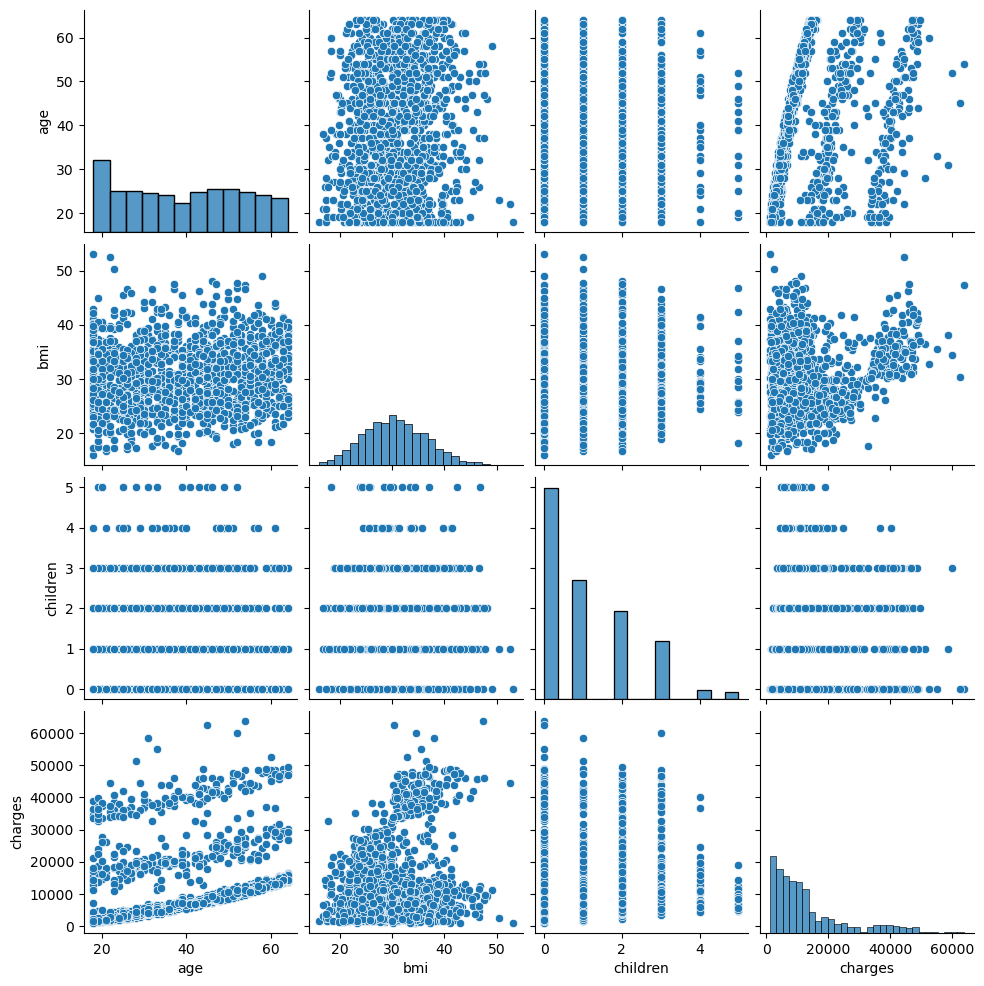

In [4]:
# Create a subset of the dataframe. 
# We do this by passing a list of these column names to the dataframe df. 
subset = df[['age', 'bmi', 'children', 'charges']]

# Now we're going to create a "pair plot" of this subset. Pair plots are a great way to visualize relationships 
# between different pairings of these variables. In a pair plot, the diagonal elements show the histogram of the 
# data for that particular variable, and the off-diagonal elements show scatter plots of one variable versus another
sns.pairplot(subset)

# lets take a look!
plt.show()

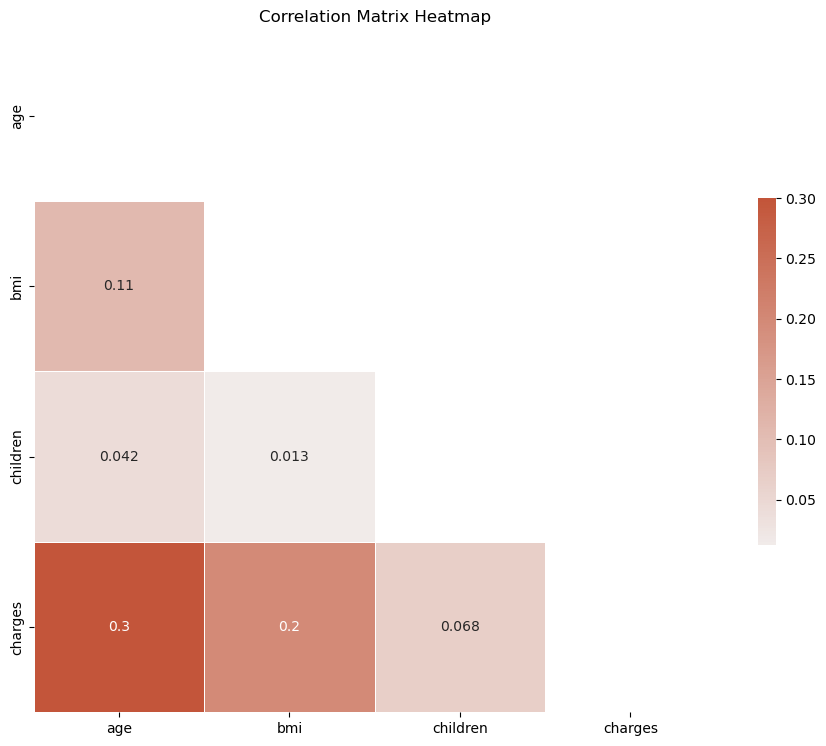

In [5]:
corr = subset.corr() # This line computes the correlation matrix of the DataFrame.
                 #  It calculates the Pearson correlation coefficient for each pair of numerical columns. 
                 # Post cleaning, all of our columns have some kind of numerical representation.

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) #  Here, create a mask for the upper triangle of your correlation matrix. 
                                               # This is done because the matrix is symmetric, i.e., the lower triangle is a mirror 
                                               # image of the upper triangle. Thus, showing both would be redundant.
                                               # You don't technially need to do this, but its a nice trick...

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
# Look at the sns documenttion for details on all of the arguments. 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

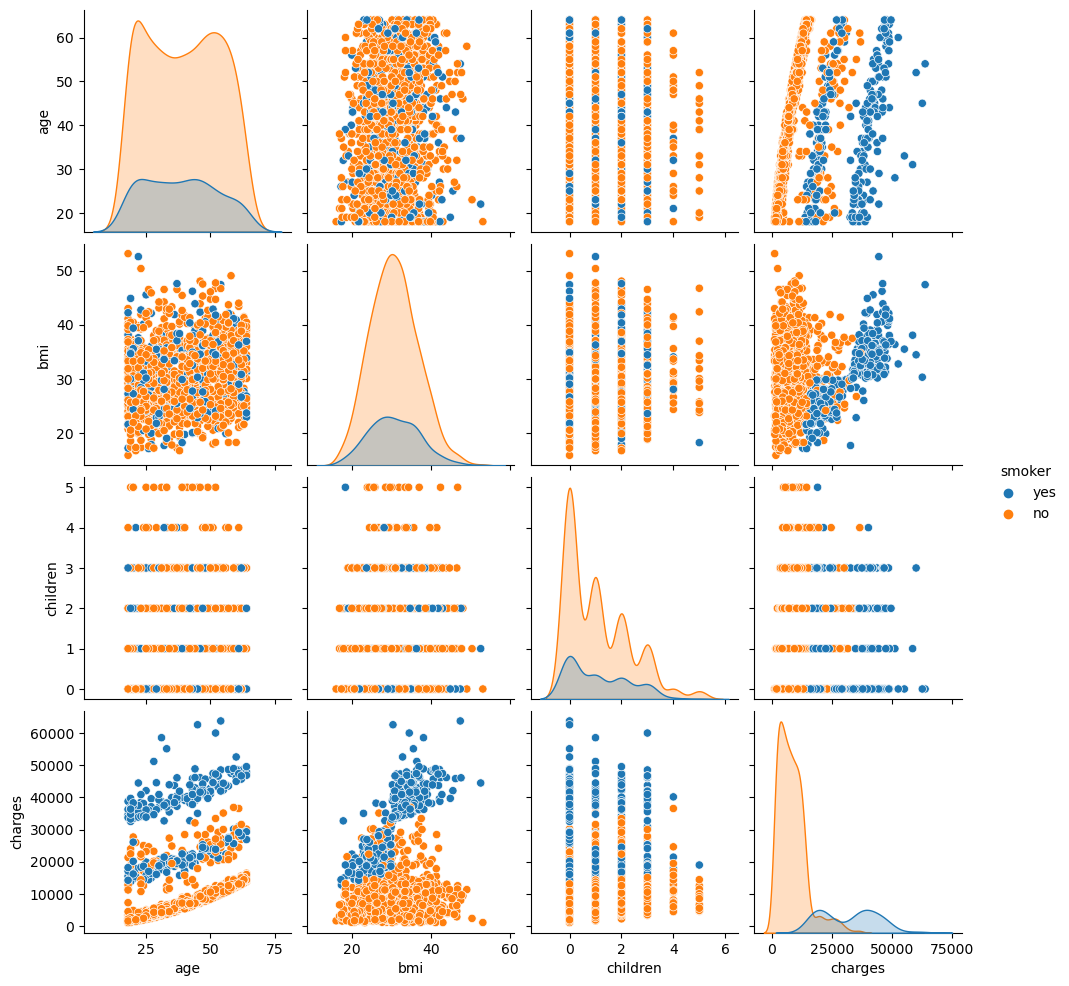

In [6]:
smoker_subset = df[['age', 'bmi', 'children', 'charges', 'smoker']]
sns.pairplot(smoker_subset, hue='smoker')
plt.show()

In [7]:
def get_weight_condition(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi < 25:
        return 'Normal Weight'
    elif bmi >= 25 and bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

In [8]:
df['weight_condition'] = df['bmi'].apply(get_weight_condition)
df.head()

,age,sex,bmi,children,smoker,region,charges,weight_condition
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


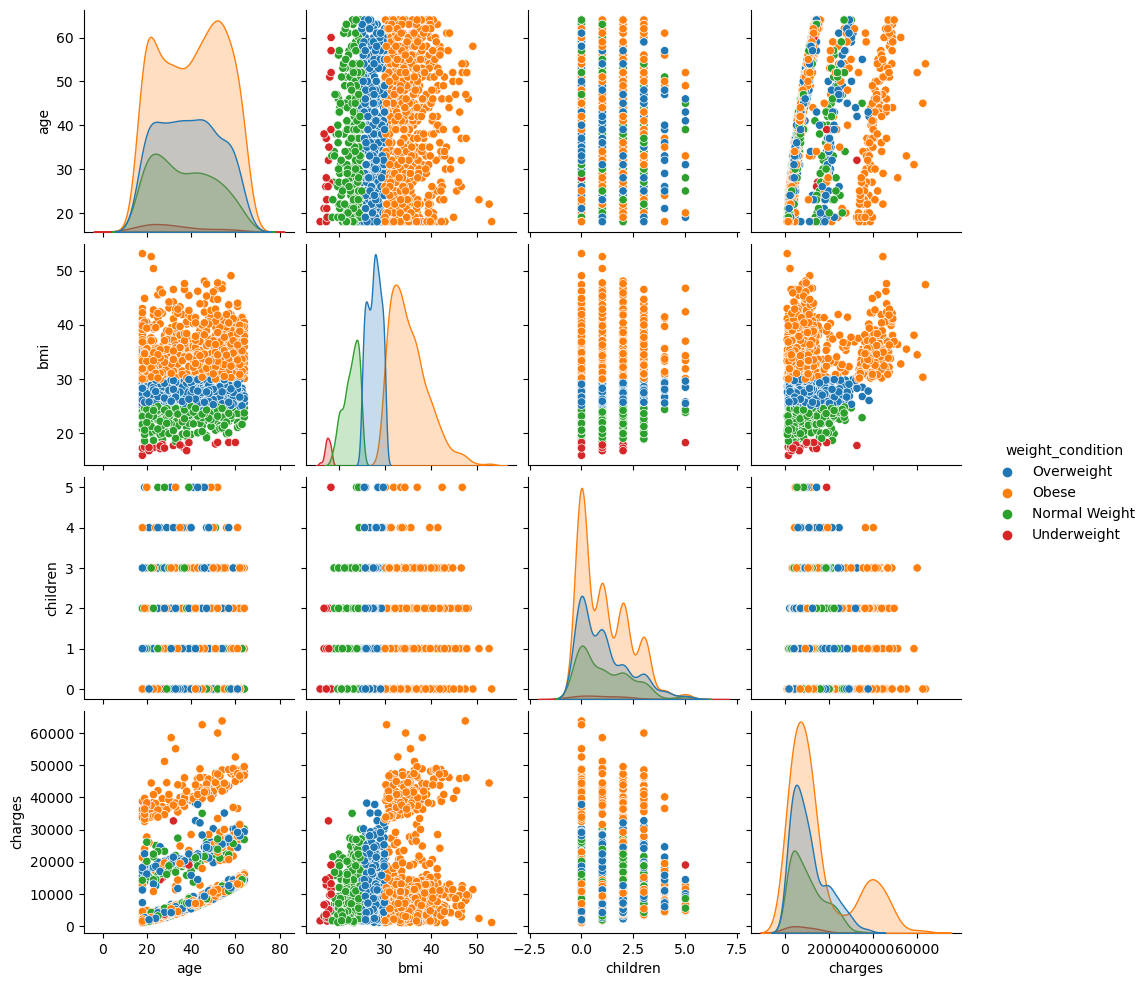

In [9]:
bmi_subset = df[['age', 'bmi', 'children', 'charges', 'weight_condition']]
sns.pairplot(bmi_subset, hue='weight_condition')
plt.show()

In [10]:
import os
os.environ["OMP_NUM_THREADS"] = '6'
from sklearn.cluster import KMeans

bmi_subset = df[['bmi','charges']]
kmeans = KMeans(n_clusters=3, n_init=10)  
kmeans.fit(bmi_subset)

KMeans(n_clusters=3, n_init=10)

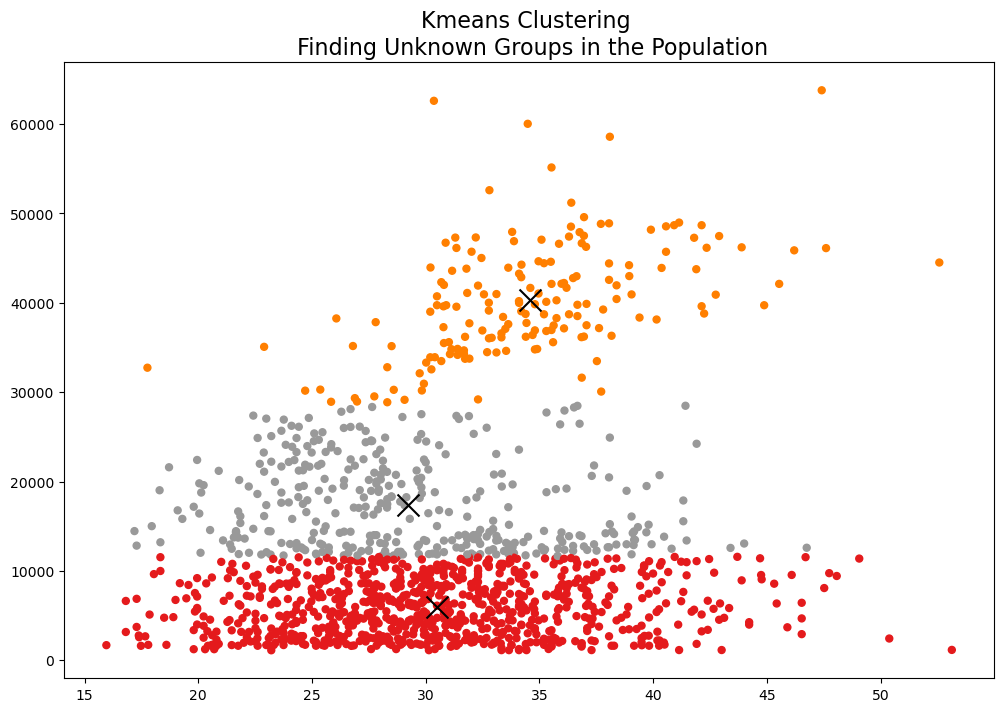

In [18]:
fig = plt.figure(figsize=(12,8))

plt.scatter(bmi_subset.values[:,0], bmi_subset.values[:,1], c=kmeans.labels_, cmap='Set1', s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

In [19]:
def kmeans_cluster(k, bmi_subset):
    kmeans = KMeans(n_clusters=k, n_init=10)  
    kmeans.fit(bmi_subset)
    
    fig = plt.figure(figsize=(12,8))

    plt.scatter(bmi_subset.values[:,0], bmi_subset.values[:,1], c=kmeans.labels_, cmap='Set1', s=25)
    plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
    plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
    plt.show()

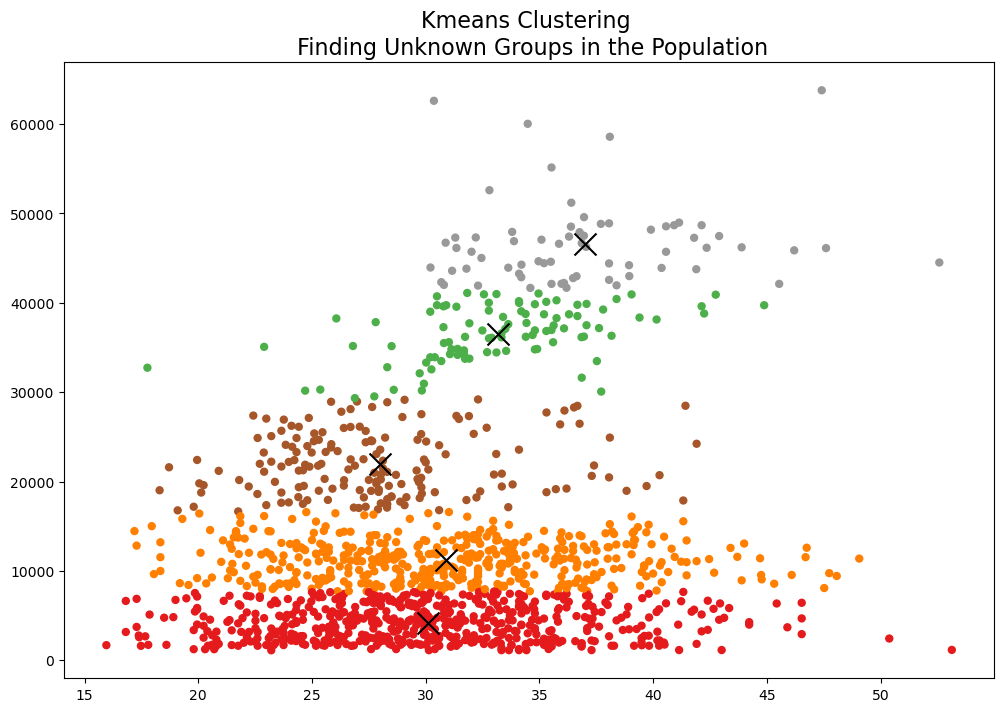

In [23]:
kmeans_cluster(5, bmi_subset)